In [ ]:
# task1 
# train a single-layer perceptron network on the following
# synthetic dataset and output its prediction results

# systhetic dataset description
# 1. each data is a single value(from  -30 to 29)
# 2. label of each data is either 0(10~), 0.5(-10~9), or 1.0(-30~-11)


# # 기본적으로 x y를 만드는 코드
# #Syntthetic data preparation (from -30 to 29 with a step size of 1)
# x =torch.arange(-30, 30, 1).view(-1, 1).type(torch.FLoatTensor).to(device)
# y =torch.zeros(x.shape[0]).to(device)
# #generate y labels for x
# y[x[:, 0] <= -10] =1.0
# y[(x[:,0] >-10) & (x[:,0] < 10)] =0.5
# y[x[:, 0] >10] =0
# y =y.unsqueeze(1)

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [6]:
# 1. 모델 정의
class SingleLayerPerceptron(nn.Module):
    def __init__(self, input_size, output_size=1):
        # 입력1 출력1인 선형 모델
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(input_size, output_size),
            nn.Sigmoid()
            # 시그모이드 활성화 함수를 사용한 출력값 0~1 사이 도도
        )
        # sequential로 순차적 실행

    def forward(self, x):
        return self.layer(x)

In [27]:
# 2. 데이터 준비
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x = torch.arange(-30, 30, 1).view(-1, 1).type(torch.FloatTensor).to(device)
# x의 -30부터 29까지 정수 쉐잎 [60, 1]
y = torch.zeros(x.shape[0]).to(device)

y[x[:, 0] <= -10] = 1.0
y[(x[:, 0] > -10) & (x[:, 0] < 10)] = 0.5
y[x[:, 0] > 10] = 0.0
y = y.unsqueeze(1)  # shape: (60, 1)
# .unsqueeze(1)을 통해 [60] -> [60,1]로 reshape
# 모델의 출력과 모양 맞추기

In [11]:
# 3. 학습 설정
model = SingleLayerPerceptron(1, 1).to(device)
criterion = nn.MSELoss()  # 다단계 출력이므로 MSELoss 사용
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [13]:
# 4. 학습 루프
epochs = 1000
for epoch in range(epochs):
    model.train()
    output = model(x)
    loss = criterion(output, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 0.0592
Epoch 100, Loss: 0.0587
Epoch 200, Loss: 0.0580
Epoch 300, Loss: 0.0572
Epoch 400, Loss: 0.0563
Epoch 500, Loss: 0.0553
Epoch 600, Loss: 0.0540
Epoch 700, Loss: 0.0525
Epoch 800, Loss: 0.0505
Epoch 900, Loss: 0.0479


In [19]:
# 5. 예측 출력
model.eval()
with torch.no_grad():
    # preds = model(x)
    # print("\n예측 결과:")
    # for i in range(0, len(x), 10):
    #     print(f"x: {x[i].item():>5}, 예측값: {preds[i].item():.4f}, 정답: {y[i].item()}")
    preds = model(x).cpu().squeeze()
    x_cpu = x.cpu().squeeze()
    y_cpu = y.cpu().squeeze()

C:\Users\qkrwo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qkrwo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qkrwo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qkrwo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


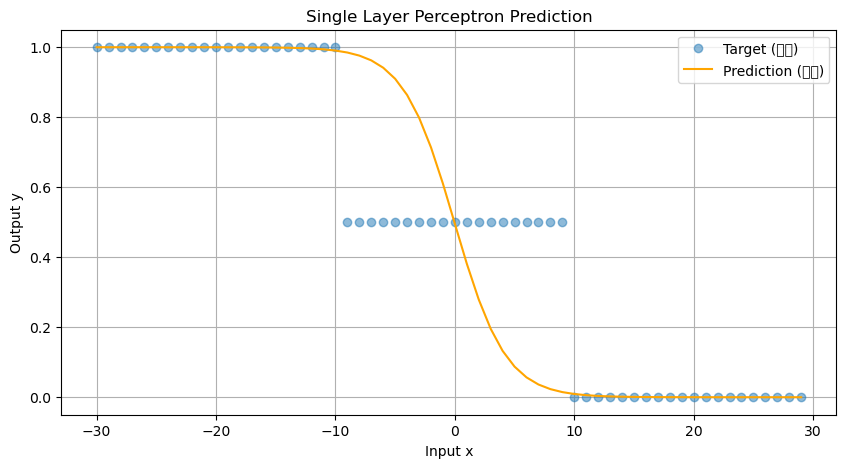

In [21]:
# ✅ 6. 시각화
plt.figure(figsize=(10, 5))
plt.plot(x_cpu, y_cpu, 'o', label='Target (정답)', alpha=0.5)
plt.plot(x_cpu, preds, '-', label='Prediction (예측)', color='orange')
plt.xlabel("Input x")
plt.ylabel("Output y")
plt.title("Single Layer Perceptron Prediction")
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# task2
# train a multi-layer perceptron network on the follwing synthetic dataset same as 5-1 and output its prediction results

# synthetic dataset description
# each data is a single value(from -30 to 29)
# label of each data is either 0(10~), 0.5(-10~9), or 1.0(-30~-11)

# 싱글레이어에서 멀티레이어로 변경해보자
# 다층 퍼셉트론을 사용해서 task1과 동일한 데이터 셋에 대해서 학습하고 예측
# Linear + Sigmoid	
# Linear → ReLU → Linear → Sigmoid

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [37]:
# ✅ 1. Multi-layer Perceptron 정의
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=1):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [39]:
# ✅ 2. 데이터 준비
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

x = torch.arange(-30, 30, 1).view(-1, 1).type(torch.FloatTensor).to(device)
y = torch.zeros(x.shape[0]).to(device)
y[x[:, 0] <= -10] = 1.0
y[(x[:, 0] > -10) & (x[:, 0] < 10)] = 0.5
y[x[:, 0] > 10] = 0.0
y = y.unsqueeze(1)

In [41]:
# ✅ 3. 모델, 손실함수, 옵티마이저
model = MultiLayerPerceptron(input_size=1, hidden_size=16, output_size=1).to(device)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [43]:
# ✅ 4. 학습 루프
epochs = 1000
for epoch in range(epochs):
    model.train()
    output = model(x)
    loss = criterion(output, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 0.2726
Epoch 100, Loss: 0.0210
Epoch 200, Loss: 0.0206
Epoch 300, Loss: 0.0203
Epoch 400, Loss: 0.0199
Epoch 500, Loss: 0.0196
Epoch 600, Loss: 0.0193
Epoch 700, Loss: 0.0190
Epoch 800, Loss: 0.0187
Epoch 900, Loss: 0.0184


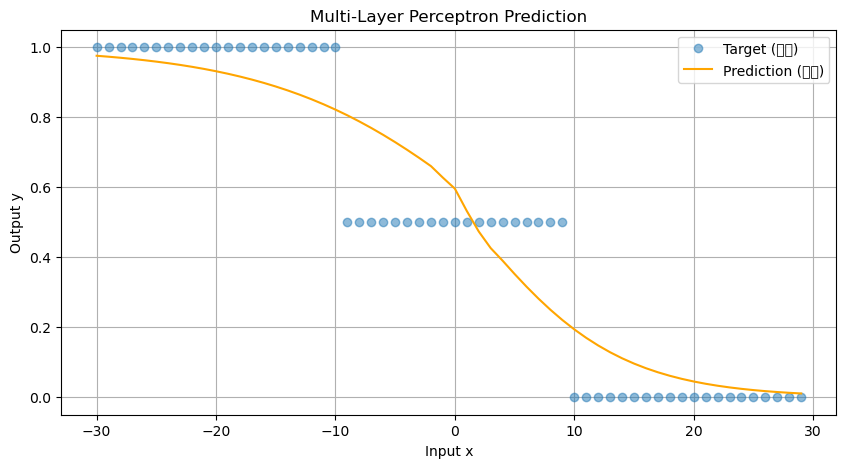

In [45]:
# ✅ 5. 예측 및 시각화
model.eval()
with torch.no_grad():
    preds = model(x).cpu().squeeze()
    x_cpu = x.cpu().squeeze()
    y_cpu = y.cpu().squeeze()

plt.figure(figsize=(10, 5))
plt.plot(x_cpu, y_cpu, 'o', label='Target (정답)', alpha=0.5)
plt.plot(x_cpu, preds, '-', label='Prediction (예측)', color='orange')
plt.xlabel("Input x")
plt.ylabel("Output y")
plt.title("Multi-Layer Perceptron Prediction")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# task3 
# train a multi-layer perceptron network on the MNIST dataset and output its prediction results
# MNUST dataset preparation

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [50]:
# ✅ 1. 데이터 준비 (MNIST)
transform = transforms.Compose([
    transforms.ToTensor(),              # [0, 255] → [0.0, 1.0]
    transforms.Normalize((0.5,), (0.5,)) # 정규화: 평균 0, 표준편차 1
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset  = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader  = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


100%|█████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:05<00:00, 1.75MB/s]
100%|██████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 142kB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:01<00:00, 1.19MB/s]
100%|█████████████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<?, ?B/s]


In [54]:
# ✅ 2. MLP 모델 정의
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),              # (1, 28, 28) → (784)
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)          # 10개의 클래스 (softmax 생략)
        )

    def forward(self, x):
        return self.model(x)

model = MLP().to(device)


In [56]:
# ✅ 3. 손실 함수 및 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [58]:
# ✅ 4. 학습 루프
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}")


Epoch 1, Loss: 0.3800
Epoch 2, Loss: 0.1796
Epoch 3, Loss: 0.1347
Epoch 4, Loss: 0.1094
Epoch 5, Loss: 0.0957


In [59]:
# ✅ 5. 정확도 측정 및 일부 예측 출력
model.eval()
correct = 0
total = 0
pred_samples = []

with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if len(pred_samples) < 10:
            pred_samples.extend(list(zip(inputs.cpu(), predicted.cpu(), labels.cpu())))

accuracy = 100 * correct / total
print(f"\n✅ Test Accuracy: {accuracy:.2f}%")



✅ Test Accuracy: 96.68%


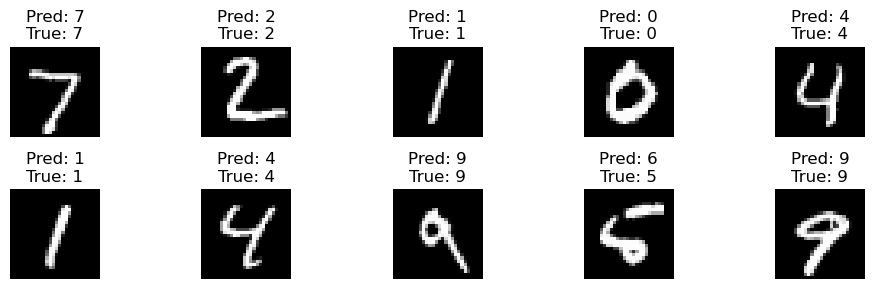

In [60]:
# ✅ 6. 예측 시각화
plt.figure(figsize=(10, 3))
for i, (img, pred, label) in enumerate(pred_samples[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"Pred: {pred}\nTrue: {label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
#task 4
# train the MNIST classification network using other parameters and various activation functions different with task3

In [ ]:
# task3의 MLP 모델 구조를 변형해서 다양한 하이퍼파라미터와 활성화 함수를 실험해보는 과제
# 데이터셋을 그대로 28x28로 유지
# 0~9 사이를 분류하는 것이 목적

# <변경사항>
# 은닉층 크기, 층수, 활성화함수, 합습률 등

# 평가지표
# 테스트 정확도
